# INFO 371 Lab: Python and Pandas

## Instructions

The goal of this lab is to make sure you are familiar with Python and Pandas for basic data analysis. This should be a review, but if you find yourself struggling you may want to consider taking a more introductory course and/or doing a few Python tutorials before next week. 

If you get stuck, a good place to look for help is the tutorials in the documentation: 

* [Getting Started Pandas Documentation](https://pandas.pydata.org/docs/getting_started/intro_tutorials/index.html) and [Pandas Tutorials](https://pandas.pydata.org/docs/getting_started/tutorials.html)
* [ScikitLearn Dataset Help](https://inria.github.io/scikit-learn-mooc/appendix/datasets_intro.html)
* [Matplotlib Code Examples](https://matplotlib.org/stable/gallery/index.html)


To run this notebook, type the following command in your terminal

```
jupyter notebook <name_of_downloaded_file>
```

***

## Introduction to the assignment

For this assignment, you will be using the California Housing Prices Data Set. Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused!

Use the following commands to load the dataset:

In [48]:
#import statements 
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [49]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

The following commands will provide some basic information about the shape of the data:

In [50]:
#this line prints a detailed description of the dataset -- feel free to comment out
print(housing.DESCR)

print(housing.keys())
print(housing.feature_names)
print(housing.data.shape)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [51]:
#convert dataset into a pandas df 
housing_df = pd.DataFrame(housing.data)

In [52]:
#prints the size of the resulting pandas df 
housing_df.columns = housing.feature_names[:]
print(housing_df.shape)

(20640, 8)


***

# Descriptive Analysis

Let's dig into the data a bit to see what we're dealing with. The first thing to do is to make sure you understand how the data is organized, what the data types are, whether there is any missing data, and so forth. Get your bearings on your own, then answer the following questions.

* How many different variables are there in the dataset, and how many different observations?


* Show that dataset does not contain any missing values.


* Display the median income in the 5 blocks that have the highest median housing price.


In [53]:
#code goes here 
housing_df["MedHouseVal"] = pd.DataFrame(housing.target)

#How many different variables are there in the dataset, and how many different observations?
print(housing_df.shape[0]) #num of different observations
print(housing_df.shape[1]) #num of different variables
print()

#detect any missing values
print(housing_df.isna().sum()) #chceck any missing values
print()

#print the median income in the 5 blocks that have the highest median housing price.
#HINT -- read the description of the dataset closely to figure out what each block is 
print(housing_df.nlargest(5, 'MedHouseVal').MedInc)

20640
9

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

89     1.2434
459    1.1696
493    7.8521
494    9.3959
509    7.8772
Name: MedInc, dtype: float64


# Answering Questions with Data 

Now lets try to answer some analytic questions with the dataset itself. Using the various python libraries, answer the following questions: 

* What is the average median house price for the blocks with the highest average number of bedrooms? How does that price compare to blocks with the lowest number of average bedrooms? What is the average price overall? 


* For blocks with **above average** number of bedrooms per household, what is the average median house price? 


* For blocks whose avarage number of bedrooms per household falls outside the 90th percentile, what is the average median house price? How many blocks fall into this category? (_Hint: use the quantile function in Pandas to get the value for the 90 percentile_)
 
 
* If you remove the blocks whose avg. number of bedrooms fall outside the 90th percentile, how much does the average median house price **change**? 

In [54]:
#code goes here 
import numpy as np

#avg. median price for highest AveBedrms
highBedrms = np.mean(housing_df[(housing_df.AveBedrms == housing_df.AveBedrms.max())].MedHouseVal)
print(highBedrms)
print()

#avg. median price for lowest AveBedrms
lowBedrms = np.mean(housing_df[(housing_df.AveBedrms == housing_df.AveBedrms.min())].MedHouseVal)
print(lowBedrms)
print()

#the house that has the lowest average number of bedrooms is 1.125 more expensive than that has the highest average number of bedrooms.
print(lowBedrms - highBedrms) 
print()

#Overall Avg 
print(np.mean(housing_df.MedHouseVal))
print()

#Avg median income for above avg. number of bedrooms 
print(np.mean(housing_df[(housing_df.AveBedrms > np.mean(housing_df.MedHouseVal))].MedInc))
print()

#Avg median house price for above avg. number of bedrooms 
print(np.mean(housing_df[(housing_df.AveBedrms > np.mean(housing_df.MedHouseVal))].MedHouseVal))
print()

#Num of blocks that fall outside the 90th percentile 
print(housing_df[(housing_df.AveBedrms > housing_df.AveBedrms.quantile(0.9))].shape[0])
print()

#Avg medican price for blocks outside 90th percentile 
print(np.mean(housing_df[(housing_df.AveBedrms > housing_df.AveBedrms.quantile(0.9))].MedHouseVal))
print()

#Calculate difference between avg. house price for entire dataset vs. dataset with 90th percentile removed
val1 = np.mean(housing_df.MedHouseVal) #avg. house price for entire dataset
val2 = np.mean(housing_df[(housing_df.AveBedrms <= housing_df.AveBedrms.quantile(0.9))].MedHouseVal) #dataset within 90th percentile
print(val2 - val1)

1.625

2.75

1.125

2.0685581690891843

3.4470949771689483

1.5186347488584468

2063

1.7833446776539086

0.03167332899986075


# Summary statistics

Create a clean, organized table that shows just the following information (no more, no less) for each variable in the dataset. Note that your table should have K rows (one for each variable) and 7 columns, ordered as below:

* The name of the variable
* The number of observations with non-missing values
* The mean of the variable
* The standard deviation of the variable
* The minimum value of the variable
* The median of the variable
* The maximum value of the variable

In [55]:
#code goes here
from tabulate import tabulate

#create a table of summary statistics
col1, col2, col3, col4, col5, col6, col7, col8, col9 = housing_df.columns[0], housing_df.columns[1], housing_df.columns[2],\
                                                       housing_df.columns[3], housing_df.columns[4], housing_df.columns[5],\
                                                       housing_df.columns[6], housing_df.columns[7], housing_df.columns[8]

data = [
    [col1, housing_df[col1].dropna().shape[0], np.mean(housing_df[col1]), np.std(housing_df[col1]), housing_df[col1].min(), housing_df[col1].median(), housing_df[col1].max()],
    [col2, housing_df[col2].dropna().shape[0], np.mean(housing_df[col2]), np.std(housing_df[col2]), housing_df[col2].min(), housing_df[col2].median(), housing_df[col2].max()],
    [col3, housing_df[col3].dropna().shape[0], np.mean(housing_df[col3]), np.std(housing_df[col3]), housing_df[col3].min(), housing_df[col3].median(), housing_df[col3].max()],
    [col4, housing_df[col4].dropna().shape[0], np.mean(housing_df[col4]), np.std(housing_df[col4]), housing_df[col4].min(), housing_df[col4].median(), housing_df[col4].max()],
    [col5, housing_df[col5].dropna().shape[0], np.mean(housing_df[col5]), np.std(housing_df[col5]), housing_df[col5].min(), housing_df[col5].median(), housing_df[col5].max()],
    [col6, housing_df[col6].dropna().shape[0], np.mean(housing_df[col6]), np.std(housing_df[col6]), housing_df[col6].min(), housing_df[col6].median(), housing_df[col6].max()],
    [col7, housing_df[col7].dropna().shape[0], np.mean(housing_df[col7]), np.std(housing_df[col7]), housing_df[col7].min(), housing_df[col7].median(), housing_df[col7].max()],
    [col8, housing_df[col8].dropna().shape[0], np.mean(housing_df[col8]), np.std(housing_df[col8]), housing_df[col8].min(), housing_df[col8].median(), housing_df[col8].max()],
    [col9, housing_df[col9].dropna().shape[0], np.mean(housing_df[col9]), np.std(housing_df[col9]), housing_df[col9].min(), housing_df[col9].median(), housing_df[col9].max()]
]
 
cols = ["Name", "# of observations", "mean", "std", "min", "median", "max"]
 
print(tabulate(data, headers = cols, tablefmt='orgtbl'))

| Name        |   # of observations |       mean |         std |         min |     median |         max |
|-------------+---------------------+------------+-------------+-------------+------------+-------------|
| MedInc      |               20640 |    3.87067 |    1.89978  |    0.4999   |    3.5348  |    15.0001  |
| HouseAge    |               20640 |   28.6395  |   12.5853   |    1        |   29       |    52       |
| AveRooms    |               20640 |    5.429   |    2.47411  |    0.846154 |    5.22913 |   141.909   |
| AveBedrms   |               20640 |    1.09668 |    0.473899 |    0.333333 |    1.04878 |    34.0667  |
| Population  |               20640 | 1425.48    | 1132.43     |    3        | 1166       | 35682       |
| AveOccup    |               20640 |    3.07066 |   10.3858   |    0.692308 |    2.81812 |  1243.33    |
| Latitude    |               20640 |   35.6319  |    2.1359   |   32.54     |   34.26    |    41.95    |
| Longitude   |               20640 | -119.57 

# Histograms and Scatterplots 

Now lets take a look at visulizing the variables in the dataset. First, use matplotlib to create a histogram that shows the distribtion of the median housing prices (the "target" variable) for your dataset.

Text(0, 0.5, 'count')

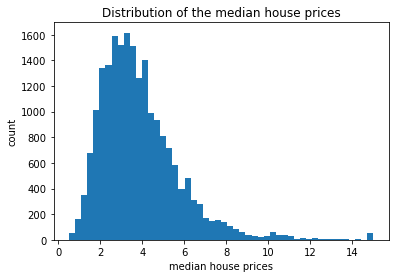

In [56]:
#code for histogram goes here-A
plt.hist(housing_df.MedInc, bins = 50)

plt.title('Distribution of the median house prices')
plt.xlabel('median house prices')
plt.ylabel('count')

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the median income (x-axis) per each block. Properly label your axes, and make sure that your graphic looks polished and professional.

Text(0, 0.5, 'median house prices')

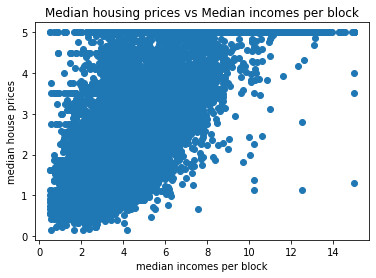

In [57]:
#code for scatterplot goes here-B
plt.scatter(x = housing_df.MedInc, y = housing_df.MedHouseVal)

plt.title('Median housing prices vs Median incomes per block')
plt.xlabel('median incomes per block')
plt.ylabel('median house prices')

Lets do another scatterplot -- this time lets use the geographic information. Create a scatter plot where the x-axis is the latitude and the y-axis is the longitude. Then set the color of each circle in the scatterplot to be the median house value (the "target" variable). Your resulting scatterplot should vaguely look like the sate of california. 

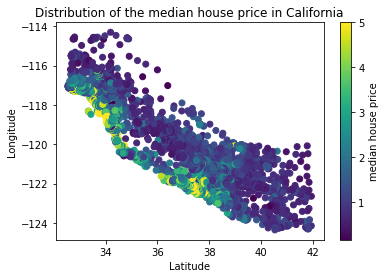

In [59]:
#code for second scatterplot goes here-C
plt.scatter(housing_df.Latitude, housing_df.Longitude, c = housing_df.MedHouseVal)

plt.title('Distribution of the median house price in California')
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.colorbar(label = 'median house price')

# Interpret 

What do each of these figures tell you about the dataset? Did you learn anything interesting about the dataset itself? Write a couple of sentences here. 

- Plot A shows that the median housing prices are centered around between 2 and 4 and is right-skewed.
- Plot B shows that the median housing prices increase as median incomes per block increase. There are some outliers found, which creates a straight line at the top of the plot when the median house price is almost 5. I am assuming that the data includes some incorrect data and errors that need to be fixed.
- Plot C shows that houses close to the coastline tend to have relatively higher house prices than houses farther from the coastline. Also, houses in Northern California tend to have higher house prices compared to houses in Southern California.